In [1]:
from IPython.display import Image

In [2]:
data=Image("")

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import os

In [7]:
os.chdir("C:\\Users\\Sathish\\OneDrive\\Desktop\\data set"); # changing current directory to my desktop

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt  #TSA=Time Series Analysis

In [9]:
import warnings

In [10]:
warnings.filterwarnings("ignore");

In [11]:
data=pd.read_csv("electric_production.csv")

In [12]:
data.shape

(397, 2)

In [13]:
data.head()

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [22]:
data["DATE"]=pd.to_datetime(data["DATE"],infer_datetime_format=True)
indexeddata=data.set_index(["DATE"])

In [23]:
from datetime import datetime
indexeddata.head(5)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


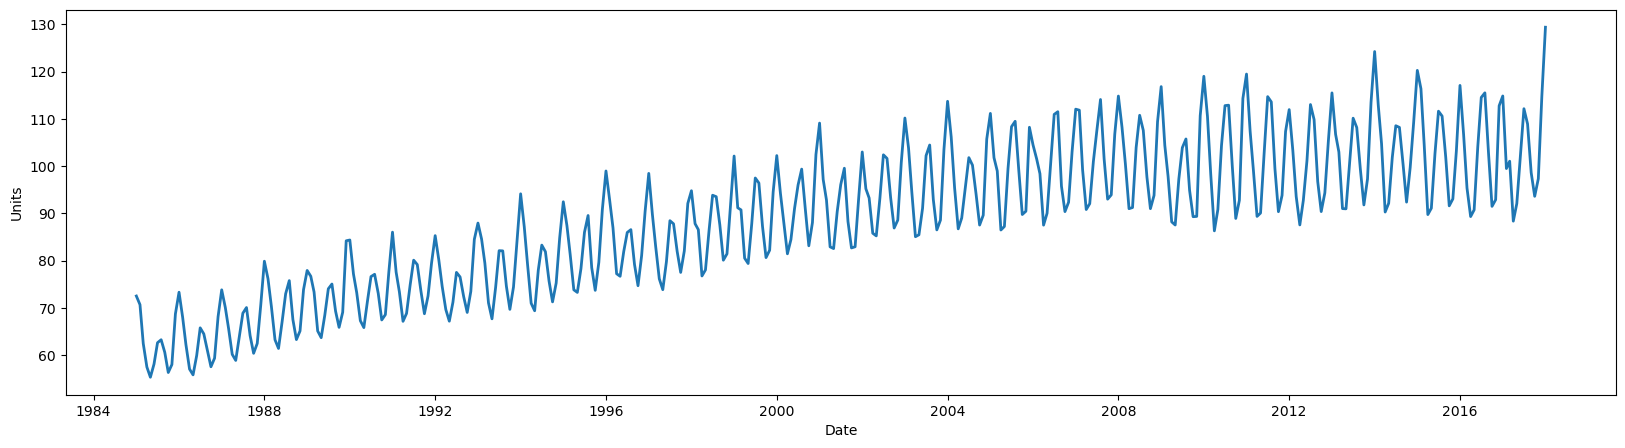

In [24]:
plt.xlabel("Date");
plt.ylabel("Units");
plt.plot(indexeddata);

In [25]:
rolmean=indexeddata.rolling(window=12).mean()

In [28]:
print(rolmean);

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01    63.68278
...                ...
2017-09-01   102.78682
2017-10-01   103.09346
2017-11-01   102.13000
2017-12-01   102.64348
2018-01-01   106.73820

[397 rows x 1 columns]


In [26]:
rolstd=indexeddata.rolling(window=12).std()

In [27]:
print(rolstd);

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


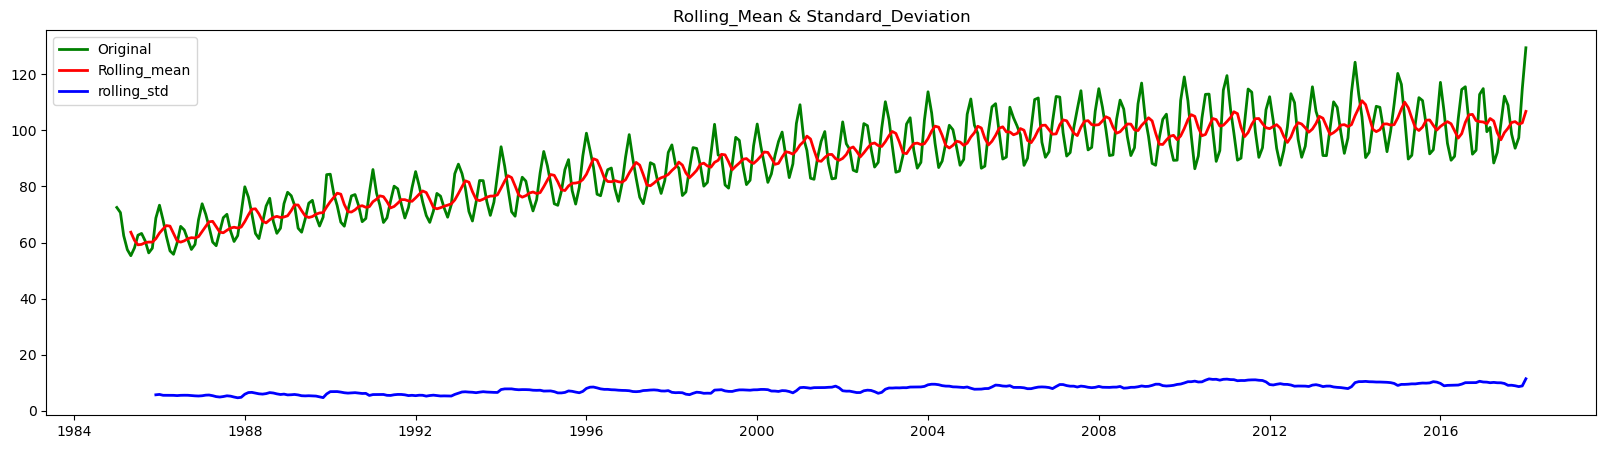

In [30]:
orig=plt.plot(indexeddata,color="green",label="Original");
mean=plt.plot(rolmean,color="red",label="Rolling_mean");
std=plt.plot(rolstd,color="blue",label="rolling_std");
plt.legend(loc="best");
plt.title("Rolling_Mean & Standard_Deviation");
plt.show(block=False);

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
dftest=adfuller(indexeddata["IPG2211A2N"],autolag="AIC");

In [33]:
dftest

(-2.256990350047245,
 0.1862146911658677,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [36]:
dfoutput=pd.Series(dftest[0:4],index=["test_statics","p_value","#Lags used","No. of Observations used"]);

In [37]:
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]=value

In [38]:
print(dfoutput);

test_statics                 -2.256990
p_value                       0.186215
#Lags used                   15.000000
No. of Observations used    381.000000
Critical Value (1%)          -3.447631
Critical Value (5%)          -2.869156
Critical Value (10%)         -2.570827
dtype: float64


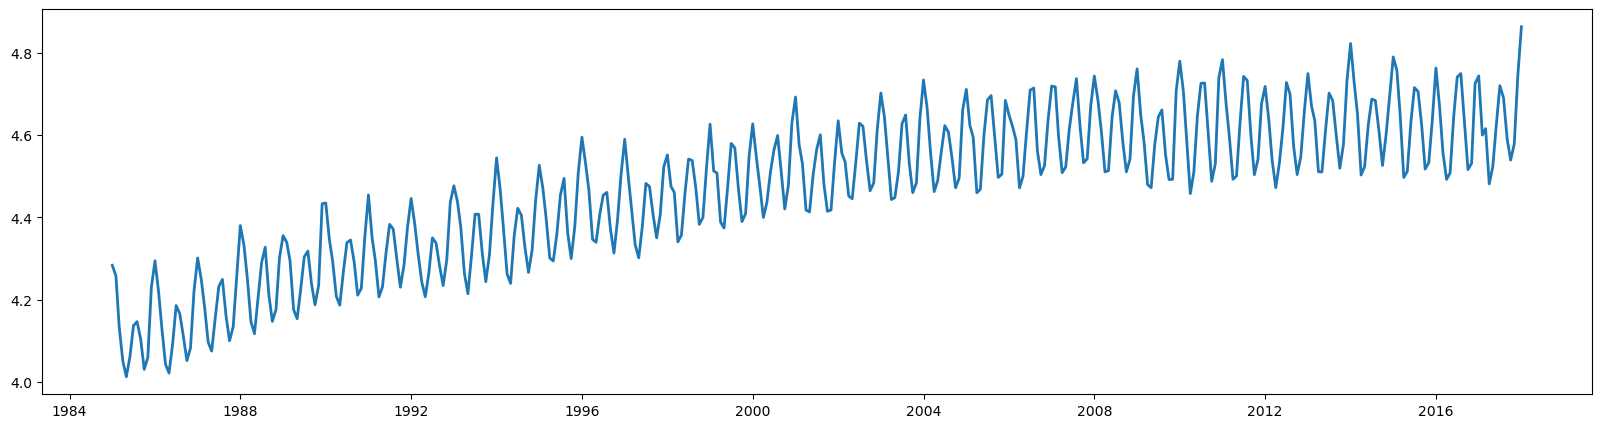

In [39]:
indexeddata_log=np.log(indexeddata);
plt.plot(indexeddata_log);

In [40]:
movingAvg=indexeddata_log.rolling(window=12).mean();

In [41]:
movingstd=indexeddata_log.rolling(window=12).std();

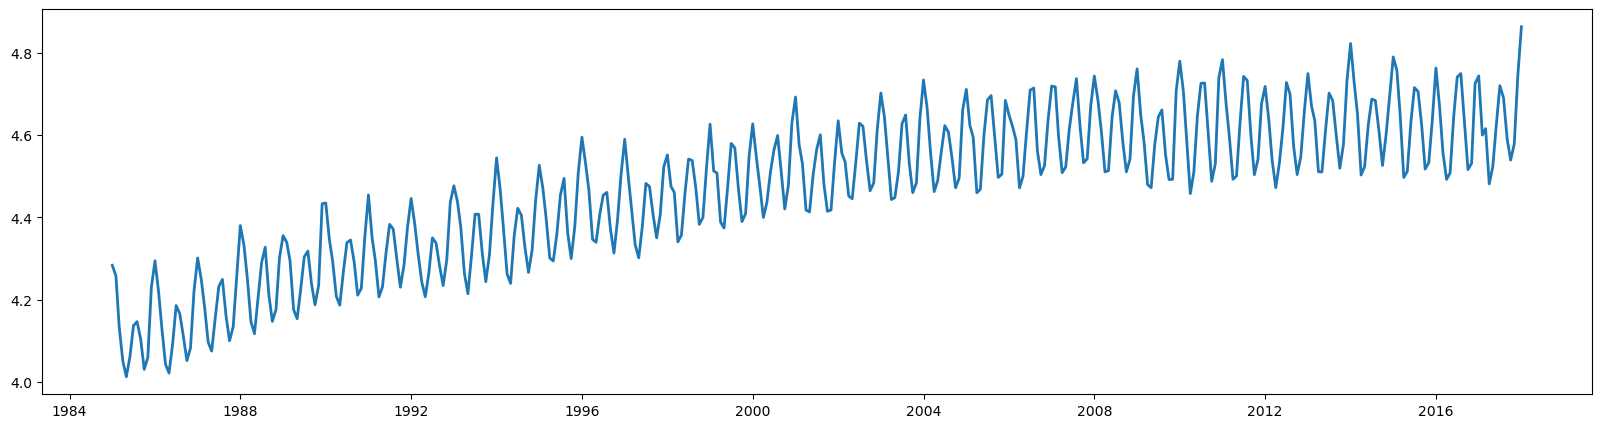

In [62]:
plt.plot(indexeddata_log);

In [63]:
print(movingAvg);

In [64]:
print(indexeddata_log);

            IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.258049
1985-03-01    4.134369
1985-04-01    4.051287
1985-05-01    4.013046
...                ...
2017-09-01    4.591227
2017-10-01    4.539177
2017-11-01    4.578168
2017-12-01    4.742505
2018-01-01    4.862945

[397 rows x 1 columns]
